In [ ]:
%pip install openml
%pip install boruta
%pip install scikit-optimize
%pip install xgboost

# Imports

In [3]:
import utils
import optimizers
import pickle
import pandas as pd
import gc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data

In [ ]:
datasets = {}

## Spambase (ID: 44)

In [ ]:
X, y, _, _ = utils.get_dataset(44)
datasets['spam'] = {
    'X': X,
    'y': y,
}

In [ ]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


## MagicTelescope (ID: 1120)

In [ ]:
X, y, _, _ = utils.get_dataset(1120)
datasets['mt'] = {
    'X': X,
    'y': y,
}

In [ ]:
X.head()

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


## KC1 (ID: 1067)

In [ ]:
X, y, _, _ = utils.get_dataset(1067)
datasets['kc1'] = {
    'X': X,
    'y': y,
}

In [ ]:
X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1,1,1,1.0,1.0,1.0,1.0,1.0
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,1187.70,65.0,10,6,0,18.0,25.0,107.0,64.0,21.0
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,635.37,37.0,2,5,0,16.0,28.0,89.0,52.0,15.0
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,132.33,21.0,0,2,0,11.0,10.0,41.0,17.0,5.0


## Phoneme (ID: 1489)

In [ ]:
X, y, _, _ = utils.get_dataset(1489)
datasets['phoneme'] = {
    'X': X,
    'y': y,
}

In [ ]:
X.head()

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127


# Feature selection & target mapping

In [ ]:
for dataset_name, dataset in datasets.items():
    y = utils.make_binary(dataset['y'])
    X = dataset['X']
    columns = utils.apply_boruta(X, y)
    X = X[columns]
    datasets[dataset_name] = {
        'X': X,
        'y': y
    }

In [ ]:
pickle.dump(datasets, open('datasets.pkl', 'wb'))

# Decision Tree Classifier

## Default Optimization

### Random Search

In [ ]:
opt = optimizers.DTCRandomOptimizer(datasets)

In [ ]:
opt.optimize(n_iter=1000)

In [ ]:
pickle.dump(opt, open('results/dtc/dtc_default_random.pkl', 'wb'))

In [ ]:
dtc_default_scores = opt.scores
dtc_default_scores.to_csv('results/dtc/dtc_default_random_scores.csv')

In [ ]:
dtc_defaults, dtc_default_score = opt.get_optimal_hyperparameters("mean_roc_auc")

In [ ]:
dtc_defaults

"{'random_state': 42, 'ccp_alpha': 0.00019142178036846147, 'max_depth': 7, 'min_samples_leaf': 45, 'min_samples_split': 48}"

In [ ]:
dtc_default_score

0.872264465

### Bayesian Search

In [ ]:
opt = optimizers.DTCBayesOptimizer(datasets)

In [ ]:
opt.optimize(n_iter=100)

Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme


In [ ]:
pickle.dump(opt, open('results/dtc/dtc_default_bayes.pkl', 'wb'))

In [ ]:
opt.best_scores.to_csv('results/dtc/dtc_default_bayes_scores.csv')
opt.best_scores

,hyperparameters,dataset,test_brier,test_roc_auc,test_accuracy
0,"OrderedDict([('model__ccp_alpha', 0.0), ('mode...",spam,0.090060,0.942071,0.887079
1,"OrderedDict([('model__ccp_alpha', 0.0), ('mode...",mt,0.117939,0.889624,0.840694
2,"OrderedDict([('model__ccp_alpha', 0.0), ('mode...",kc1,0.115593,0.767620,0.841232
3,"OrderedDict([('model__ccp_alpha', 0.0), ('mode...",phoneme,0.118658,0.895116,0.836263


In [ ]:
dtc_default_scores_iter = opt.iter_scores
dtc_default_scores_iter.to_csv('results/dtc/dtc_default_bayes_scores_iter.csv')
dtc_default_scores_iter.head()

,iter,dataset,hyperparameters,roc_auc
0,0,spam,"{'model__ccp_alpha': 0.46854101127480363, 'mod...",0.5
1,1,spam,"{'model__ccp_alpha': 0.9432285529665488, 'mode...",0.5
2,2,spam,"{'model__ccp_alpha': 0.6322596806301894, 'mode...",0.5
3,3,spam,"{'model__ccp_alpha': 0.5559221181853791, 'mode...",0.5
4,4,spam,"{'model__ccp_alpha': 0.5148839408871806, 'mode...",0.5


### Results

In [94]:
bayes_scores = pd.read_csv('results/dtc/dtc_default_bayes_scores_iter.csv')

In [95]:
bayes_scores.head()

,Unnamed: 0,iter,dataset,hyperparameters,roc_auc
0,0,0,spam,"{'model__ccp_alpha': 0.46854101127480363, 'mod...",0.5
1,1,1,spam,"{'model__ccp_alpha': 0.9432285529665488, 'mode...",0.5
2,2,2,spam,"{'model__ccp_alpha': 0.6322596806301894, 'mode...",0.5
3,3,3,spam,"{'model__ccp_alpha': 0.5559221181853791, 'mode...",0.5
4,4,4,spam,"{'model__ccp_alpha': 0.5148839408871806, 'mode...",0.5


In [96]:
random_scores = pd.read_csv('results/dtc/dtc_default_random_scores.csv')

In [97]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'ccp_alpha': 0.7833016317...",0.201199,0.5,0.701566,0.238774,0.5,0.605955,0.227986,0.5,0.64837,0.130682,0.5,0.845424,0.207352,0.5,0.706514
1,1,"{'random_state': 42, 'ccp_alpha': 0.7642128346...",0.201199,0.5,0.701566,0.238774,0.5,0.605955,0.227986,0.5,0.64837,0.130682,0.5,0.845424,0.207352,0.5,0.706514
2,2,"{'random_state': 42, 'ccp_alpha': 0.7051442738...",0.201199,0.5,0.701566,0.238774,0.5,0.605955,0.227986,0.5,0.64837,0.130682,0.5,0.845424,0.207352,0.5,0.706514
3,3,"{'random_state': 42, 'ccp_alpha': 0.6234479614...",0.201199,0.5,0.701566,0.238774,0.5,0.605955,0.227986,0.5,0.64837,0.130682,0.5,0.845424,0.207352,0.5,0.706514
4,4,"{'random_state': 42, 'ccp_alpha': 0.4605330726...",0.201199,0.5,0.701566,0.238774,0.5,0.605955,0.227986,0.5,0.64837,0.130682,0.5,0.845424,0.207352,0.5,0.706514


#### Spam

Text(0.5, 1.0, 'Decision Tree Classifier (Spam dataset)')

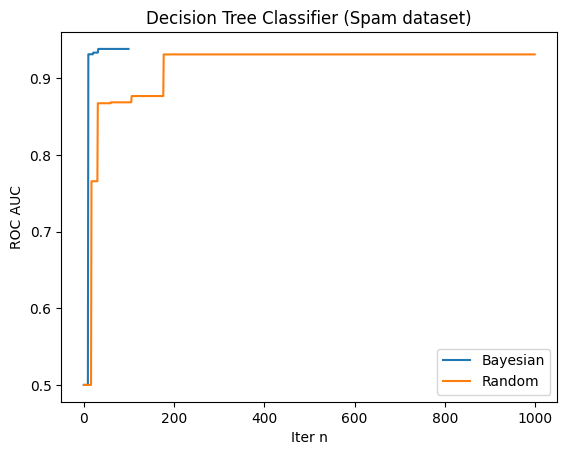

In [98]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'spam'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.spam_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Decision Tree Classifier (Spam dataset)')

In [99]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9386
ROC AUC score for Random search: 0.9314


#### MagicTelescope

Text(0.5, 1.0, 'Decision Tree Classifier (MT dataset)')

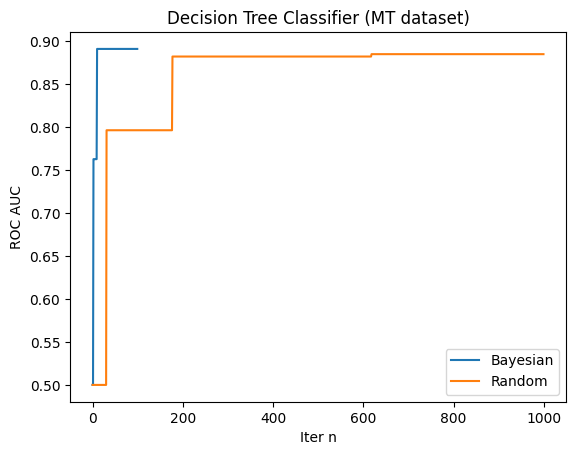

In [100]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'mt'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.mt_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Decision Tree Classifier (MT dataset)')

In [101]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.8913
ROC AUC score for Random search: 0.8853


#### KC1

Text(0.5, 1.0, 'Decision Tree Classifier (KC1 dataset)')

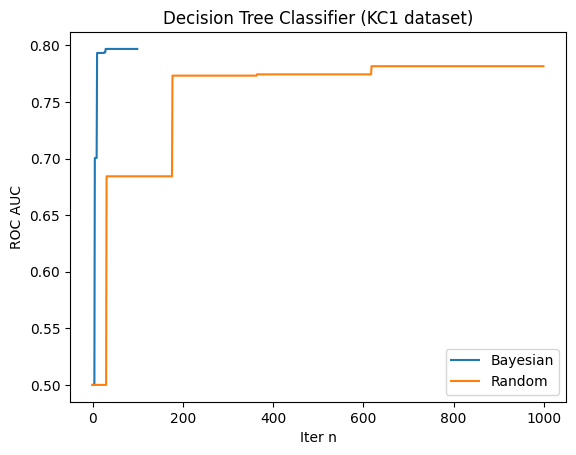

In [102]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'kc1'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.kc1_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Decision Tree Classifier (KC1 dataset)')

In [103]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.7969
ROC AUC score for Random search: 0.7816


#### Phoneme

Text(0.5, 1.0, 'Decision Tree Classifier (Phoneme dataset)')

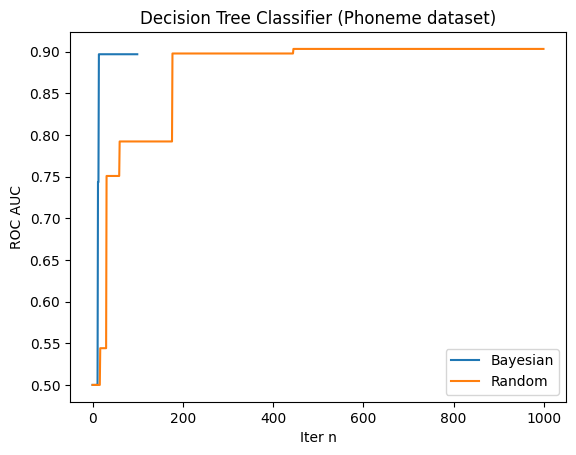

In [104]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'phoneme'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.phoneme_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Decision Tree Classifier (Phoneme dataset)')

In [105]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.8970
ROC AUC score for Random search: 0.9033


## Tunability

In [ ]:
dtc_defaults = {'random_state': 42, 
                'ccp_alpha': 0.00019142178036846147, 
                'max_depth': 7, 
                'min_samples_leaf': 45, 
                'min_samples_split': 48}

In [ ]:
bayes_defaults = {
    "spam": {
        "ccp_alpha": 0.0,
        "max_depth": 28,
        "min_samples_leaf": 30,
        "min_samples_split": 60,
        "random_state": 42,
    },
    "mt": {
        "ccp_alpha": 0.0,
        "max_depth": 18,
        "min_samples_leaf": 60,
        "min_samples_split": 60,
        "random_state": 42,
    },
    "kc1": {
        "ccp_alpha": 0.0,
        "max_depth": 29,
        "min_samples_leaf": 51,
        "min_samples_split": 60,
        "random_state": 42,
    },
    "phoneme": {
        "ccp_alpha": 0.0,
        "max_depth": 30,
        "min_samples_leaf": 1,
        "min_samples_split": 60,
        "random_state": 42,
    }
}

### ccp_alpha

#### Random search -> Random search

In [ ]:
opt = optimizers.DTCRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'max_depth': 7, 
                'min_samples_leaf': 45, 
                'min_samples_split': 48})

In [ ]:
opt.optimize(n_iter=1000)

In [ ]:
pickle.dump(opt, open('/work/results/dtc/dtc_ccp_alpha_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/dtc/dtc_ccp_alpha_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.DTCRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'max_depth': bayes_defaults[dataset_name]['max_depth'], 
                'min_samples_leaf': bayes_defaults[dataset_name]['min_samples_leaf'], 
                'min_samples_split': bayes_defaults[dataset_name]['min_samples_split']})
    opt.optimize(n_iter=1000)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('/work/results/dtc/dtc_ccp_alpha_bayes_scores.csv')

#### Results

In [54]:
bayes_scores = pd.read_csv('results/dtc/dtc_ccp_alpha_bayes_scores.csv')

In [55]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'random_state': 42, 'ccp_alpha': 0.8172660140...",0.238774,0.5,0.605955,spam
1,1,"{'random_state': 42, 'ccp_alpha': 0.4074359694...",0.238774,0.5,0.605955,spam
2,2,"{'random_state': 42, 'ccp_alpha': 0.1967414416...",0.238774,0.5,0.605955,spam
3,3,"{'random_state': 42, 'ccp_alpha': 0.6398815922...",0.238774,0.5,0.605955,spam
4,4,"{'random_state': 42, 'ccp_alpha': 0.7916042924...",0.238774,0.5,0.605955,spam


In [56]:
random_scores = pd.read_csv('results/dtc/dtc_ccp_alpha_random_scores.csv')

In [57]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'ccp_alpha': 0.1272225345...",0.182645,0.566472,0.746720,0.164557,0.765888,0.786570,0.227986,0.500000,0.648370,0.130682,0.5,0.845424,0.207352,0.500000,0.706514
1,1,"{'random_state': 42, 'ccp_alpha': 0.2797743944...",0.201199,0.500000,0.701566,0.238774,0.500000,0.605955,0.227986,0.500000,0.648370,0.130682,0.5,0.845424,0.207352,0.500000,0.706514
2,2,"{'random_state': 42, 'ccp_alpha': 0.3312141085...",0.201199,0.500000,0.701566,0.238774,0.500000,0.605955,0.227986,0.500000,0.648370,0.130682,0.5,0.845424,0.207352,0.500000,0.706514
3,3,"{'random_state': 42, 'ccp_alpha': 0.0609121135...",0.160319,0.686809,0.779275,0.160612,0.783110,0.790479,0.185653,0.722112,0.727497,0.130682,0.5,0.845424,0.164329,0.742014,0.753701
4,4,"{'random_state': 42, 'ccp_alpha': 0.8653408064...",0.201199,0.500000,0.701566,0.238774,0.500000,0.605955,0.227986,0.500000,0.648370,0.130682,0.5,0.845424,0.207352,0.500000,0.706514


Text(0.5, 1.0, 'ccp_alpha tunability (Random defaults)')

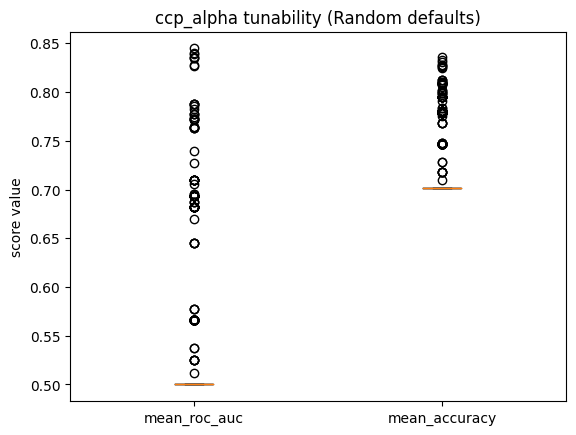

In [58]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("ccp_alpha tunability (Random defaults)")

Text(0.5, 1.0, 'ccp_alpha tunability (Bayesian defaults)')

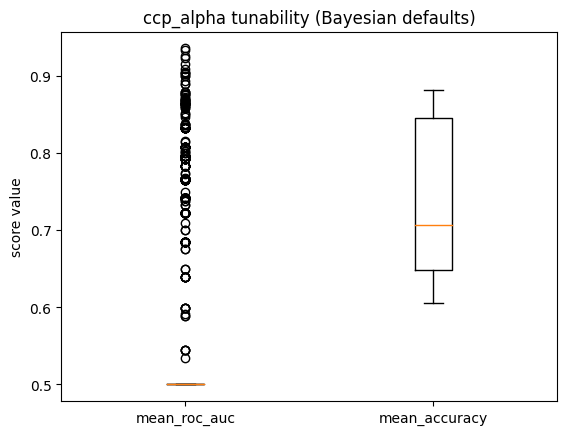

In [59]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("ccp_alpha tunability (Bayesian defaults)")

### max_depth

#### Random search -> Random search

In [ ]:
opt = optimizers.DTCRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'ccp_alpha': 0.00019142178036846147, 
                'min_samples_leaf': 45, 
                'min_samples_split': 48})

In [ ]:
opt.optimize(n_iter=1000)

In [ ]:
pickle.dump(opt, open('/work/results/dtc/dtc_max_depth_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/dtc/dtc_max_depth_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.DTCRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'ccp_alpha': bayes_defaults[dataset_name]['ccp_alpha'], 
                'min_samples_leaf': bayes_defaults[dataset_name]['min_samples_leaf'], 
                'min_samples_split': bayes_defaults[dataset_name]['min_samples_split']})
    opt.optimize(n_iter=1000)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('/work/results/dtc/dtc_max_depth_bayes_scores.csv')

#### Results

In [52]:
bayes_scores = pd.read_csv('results/dtc/dtc_max_depth_bayes_scores.csv')

In [53]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.089219,0.935134,0.880467,spam
1,1,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
2,2,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
3,3,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
4,4,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.089994,0.931438,0.881118,spam


In [60]:
random_scores = pd.read_csv('results/dtc/dtc_max_depth_random_scores.csv')

In [61]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.135992,0.808851,0.805449,0.127510,0.863548,0.821784,0.152500,0.796629,0.789905,0.112294,0.771258,0.840677,0.151663,0.803970,0.769430
1,1,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.110776,0.874838,0.846390,0.092240,0.933220,0.876115,0.114387,0.896829,0.845426,0.114952,0.777161,0.839259,0.121525,0.892143,0.824758
2,2,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.110776,0.874838,0.846390,0.092240,0.933220,0.876115,0.114387,0.896829,0.845426,0.114952,0.777161,0.839259,0.121525,0.892143,0.824758
3,3,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.115691,0.862600,0.839418,0.094022,0.925916,0.878724,0.126621,0.867472,0.828023,0.113889,0.779449,0.841155,0.128231,0.877564,0.809772
4,4,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.110798,0.874786,0.846376,0.092240,0.933220,0.876115,0.114476,0.896618,0.845373,0.114952,0.777161,0.839259,0.121525,0.892143,0.824758


Text(0.5, 1.0, 'max_depth tunability (Random defaults)')

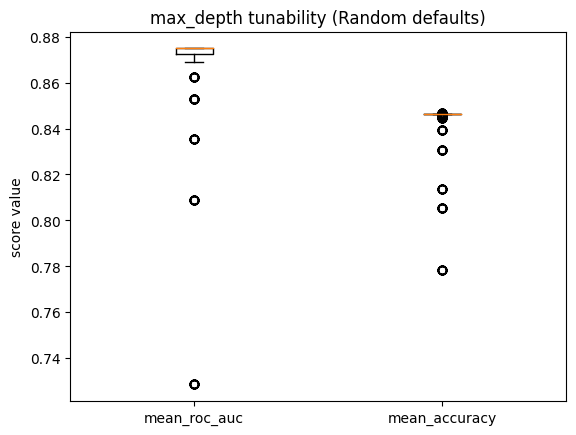

In [62]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("max_depth tunability (Random defaults)")

Text(0.5, 1.0, 'max_depth tunability (Bayesian defaults)')

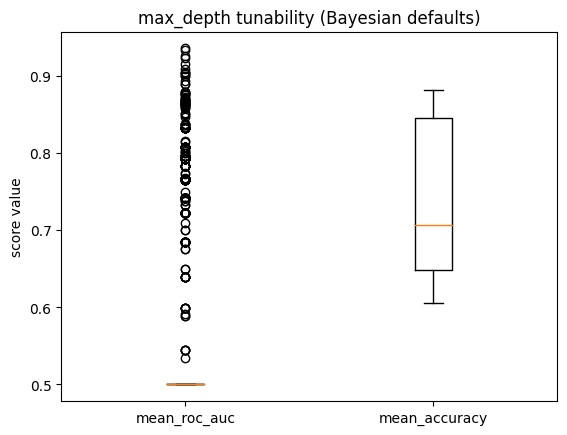

In [63]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("max_depth tunability (Bayesian defaults)")

### min_samples_leaf

#### Random search -> Random search

In [ ]:
opt = optimizers.DTCRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'ccp_alpha': 0.00019142178036846147, 
                'max_depth': 7, 
                'min_samples_split': 48})

In [ ]:
opt.optimize(n_iter=1000)

In [ ]:
pickle.dump(opt, open('/work/results/dtc/dtc_min_samples_leaf_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/dtc/dtc_min_samples_leaf_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.DTCRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'ccp_alpha': bayes_defaults[dataset_name]['ccp_alpha'], 
                'max_depth': bayes_defaults[dataset_name]['max_depth'], 
                'min_samples_split': bayes_defaults[dataset_name]['min_samples_split']})
    opt.optimize(n_iter=1000)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('/work/results/dtc/dtc_min_samples_leaf_bayes_scores.csv')

#### Results

In [64]:
bayes_scores = pd.read_csv('results/dtc/dtc_min_samples_leaf_bayes_scores.csv')

In [65]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.090015,0.938412,0.880030,spam
1,1,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.090395,0.935230,0.879812,spam
2,2,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.094885,0.930046,0.876986,spam
3,3,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088182,0.940571,0.880685,spam
4,4,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.090125,0.938697,0.879812,spam


In [66]:
random_scores = pd.read_csv('results/dtc/dtc_min_samples_leaf_random_scores.csv')

In [67]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.110883,0.870823,0.847296,0.090682,0.933328,0.880683,0.117782,0.885195,0.841220,0.116259,0.769801,0.836414,0.118808,0.894969,0.830867
1,1,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.111739,0.870300,0.845547,0.092566,0.932581,0.876767,0.118066,0.885183,0.840063,0.114995,0.772116,0.841155,0.121329,0.891319,0.824203
2,2,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.110578,0.868431,0.849683,0.091787,0.927438,0.877420,0.118082,0.882166,0.842271,0.120199,0.762882,0.832628,0.112244,0.901238,0.846412
3,3,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.109696,0.872439,0.847481,0.090304,0.932426,0.880030,0.117401,0.884867,0.842219,0.116121,0.773351,0.829775,0.114960,0.899111,0.837899
4,4,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.110660,0.868768,0.849699,0.091698,0.928799,0.877855,0.118082,0.882166,0.842271,0.120619,0.762992,0.832628,0.112243,0.901114,0.846042


Text(0.5, 1.0, 'min_samples_leaf tunability (Random defaults)')

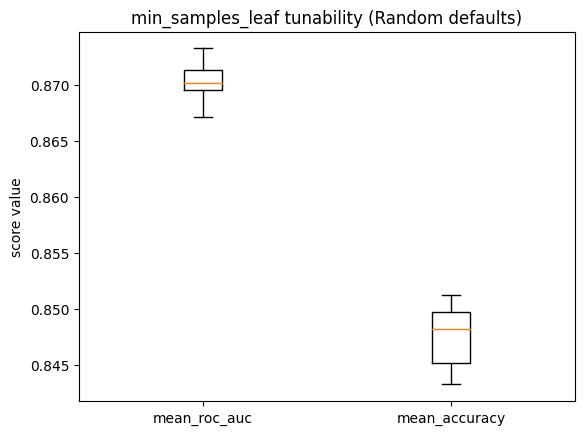

In [68]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_leaf tunability (Random defaults)")

Text(0.5, 1.0, 'min_samples_leaf tunability (Bayesian defaults)')

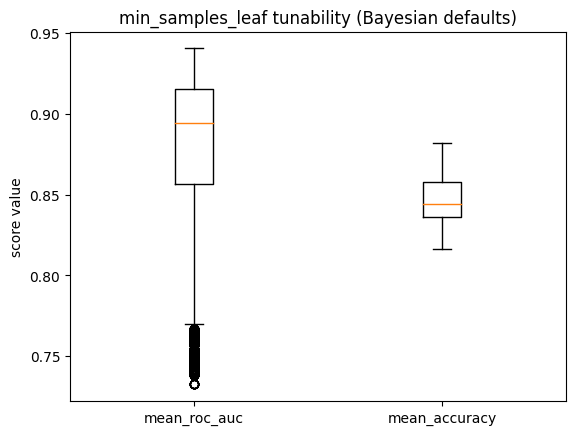

In [69]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_leaf tunability (Bayesian defaults)")

### min_samples_split

#### Random search -> Random search

In [ ]:
opt = optimizers.DTCRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'ccp_alpha': 0.00019142178036846147, 
                'max_depth': 7, 
                'min_samples_leaf': 45})

In [ ]:
opt.optimize(n_iter=1000)

Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 802/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 803/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 804/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 805/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 806/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 807/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 808/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 809/1000
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 810/1000
R

In [ ]:
pickle.dump(opt, open('/work/results/dtc/dtc_min_samples_split_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/dtc/dtc_min_samples_split_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.DTCRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'ccp_alpha': bayes_defaults[dataset_name]['ccp_alpha'], 
                'min_samples_leaf': bayes_defaults[dataset_name]['min_samples_leaf'], 
                'max_depth': bayes_defaults[dataset_name]['max_depth']})
    opt.optimize(n_iter=1000)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    gc.collect()
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('/work/results/dtc/dtc_min_samples_split_bayes_scores.csv')

Running dataset phoneme
Running iteration 502/1000
Running dataset phoneme
Running iteration 503/1000
Running dataset phoneme
Running iteration 504/1000
Running dataset phoneme
Running iteration 505/1000
Running dataset phoneme
Running iteration 506/1000
Running dataset phoneme
Running iteration 507/1000
Running dataset phoneme
Running iteration 508/1000
Running dataset phoneme
Running iteration 509/1000
Running dataset phoneme
Running iteration 510/1000
Running dataset phoneme
Running iteration 511/1000
Running dataset phoneme
Running iteration 512/1000
Running dataset phoneme
Running iteration 513/1000
Running dataset phoneme
Running iteration 514/1000
Running dataset phoneme
Running iteration 515/1000
Running dataset phoneme
Running iteration 516/1000
Running dataset phoneme
Running iteration 517/1000
Running dataset phoneme
Running iteration 518/1000
Running dataset phoneme
Running iteration 519/1000
Running dataset phoneme
Running iteration 520/1000
Running dataset phoneme
Running

#### Results

In [70]:
bayes_scores = pd.read_csv('results/dtc/dtc_min_samples_split_bayes_scores.csv')

In [72]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
1,1,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
2,2,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
3,3,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam
4,4,"{'random_state': 42, 'ccp_alpha': 0.0, 'max_de...",0.088562,0.939549,0.880467,spam


In [71]:
random_scores = pd.read_csv('results/dtc/dtc_min_samples_split_random_scores.csv')

In [73]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.111708,0.872264,0.845238,0.093157,0.931154,0.876115,0.118074,0.885251,0.840221,0.114552,0.781596,0.841155,0.12105,0.891056,0.823463
1,1,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.111708,0.872264,0.845238,0.093157,0.931154,0.876115,0.118074,0.885251,0.840221,0.114552,0.781596,0.841155,0.12105,0.891056,0.823463
2,2,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.111708,0.872264,0.845238,0.093157,0.931154,0.876115,0.118074,0.885251,0.840221,0.114552,0.781596,0.841155,0.12105,0.891056,0.823463
3,3,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.111708,0.872264,0.845238,0.093157,0.931154,0.876115,0.118074,0.885251,0.840221,0.114552,0.781596,0.841155,0.12105,0.891056,0.823463
4,4,"{'random_state': 42, 'ccp_alpha': 0.0001914217...",0.111708,0.872264,0.845238,0.093157,0.931154,0.876115,0.118074,0.885251,0.840221,0.114552,0.781596,0.841155,0.12105,0.891056,0.823463


Text(0.5, 1.0, 'min_samples_split tunability (Random defaults)')

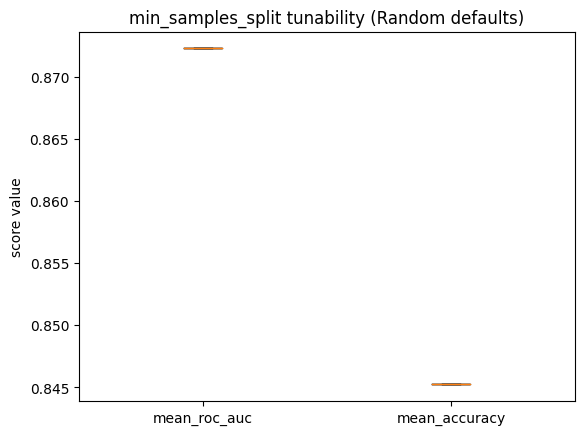

In [74]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_split tunability (Random defaults)")

Text(0.5, 1.0, 'min_samples_split tunability (Bayesian defaults)')

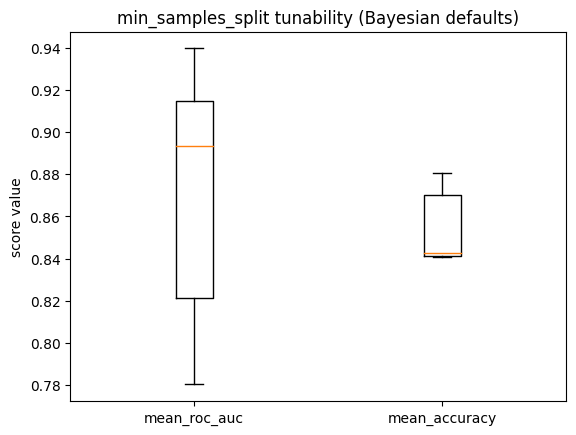

In [75]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_split tunability (Bayesian defaults)")

### Tunability scores

In [124]:
metric = 'roc_auc'
dataset_names = ['spam', 'mt', 'kc1', 'phoneme'] #datasets.keys()
n_datasets = len(dataset_names)
params = ['ccp_alpha', 'max_depth', 'min_samples_leaf', 'min_samples_split']
columns = ['model', 'parameter', 'search_type', 'tunability']
results = []

default_scores = pd.read_csv('results/dtc/dtc_default_random_scores.csv').sort_values(f'mean_{metric}', ascending=False).iloc[0]
default_score = default_scores[f'mean_{metric}']

for param in params:
    tuned_df = pd.read_csv(f'results/dtc/dtc_{param}_random_scores.csv')
    tunability = 0
    
    for name in dataset_names:
        max_score = max(tuned_df[f'{name}_{metric}'])
        tunability += max_score
        
    tunability /= n_datasets
    tunability -= default_score
    results.append(['dtc', param, 'random', tunability])
    
random_tunability = pd.DataFrame(results, columns=columns)
random_tunability

,model,parameter,search_type,tunability
0,dtc,ccp_alpha,random,-0.0276
1,dtc,max_depth,random,0.0046
2,dtc,min_samples_leaf,random,0.0045
3,dtc,min_samples_split,random,0.0000


In [125]:
metric = 'roc_auc'
dataset_names = ['spam', 'mt', 'kc1', 'phoneme'] #datasets.keys()
n_datasets = len(dataset_names)
params = ['ccp_alpha', 'max_depth', 'min_samples_leaf', 'min_samples_split']
columns = ['model', 'parameter', 'search_type', 'tunability']
results = []

default_scores = pd.read_csv('results/dtc/dtc_default_bayes_scores.csv')
default_score = np.mean(default_scores[f'test_{metric}'])


for param in params:
    tuned_df = pd.read_csv(f'results/dtc/dtc_{param}_bayes_scores.csv')
    tunability = 0
    
    for name in dataset_names:
        max_score = max(tuned_df.loc[tuned_df['dataset'] == name][f'mean_{metric}'])
        tunability += max_score
        
    tunability /= n_datasets
    tunability -= default_score
    results.append(['dtc', param, 'bayes', tunability])
    
bayes_tunability = pd.DataFrame(results, columns=columns)
bayes_tunability

,model,parameter,search_type,tunability
0,dtc,ccp_alpha,bayes,0.0022
1,dtc,max_depth,bayes,0.0084
2,dtc,min_samples_leaf,bayes,0.0095
3,dtc,min_samples_split,bayes,0.0062


In [126]:
dtc_tunability = pd.concat([random_tunability, bayes_tunability], ignore_index=True)
dtc_tunability

,model,parameter,search_type,tunability
0,dtc,ccp_alpha,random,-0.0276
1,dtc,max_depth,random,0.0046
2,dtc,min_samples_leaf,random,0.0045
3,dtc,min_samples_split,random,0.0000
4,dtc,ccp_alpha,bayes,0.0022
5,dtc,max_depth,bayes,0.0084
6,dtc,min_samples_leaf,bayes,0.0095
7,dtc,min_samples_split,bayes,0.0062


# K Nearest Neighbors

## Default Optimization

Since the range used in the paper is [1, 30], it makes sense to only run 30 pseudorandom iterations for KNN classifier.

### Random Search

In [ ]:
opt = optimizers.KNNRandomOptimizer(datasets)

In [ ]:
opt.optimize(n_iter=30)

Running iteration 1/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 2/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 3/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 4/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 5/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 6/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 7/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 8/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 9/30
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 10/30
Running datas

In [ ]:
pickle.dump(opt, open('/work/results/knn/knn_default_random.pkl', 'wb'))

In [ ]:
knn_default_scores = opt.scores
knn_default_scores.to_csv('/work/results/knn/knn_default_random_scores.csv')

In [ ]:
knn_defaults, knn_default_score = opt.get_optimal_hyperparameters('mean_roc_auc')

In [ ]:
knn_defaults

"{'n_jobs': -1, 'n_neighbors': 19}"

In [ ]:
knn_default_score

0.8892942670289556

### Bayesian Search

In [ ]:
opt = optimizers.KNNBayesOptimizer(datasets)

In [ ]:
opt.optimize(n_iter=30)

Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme


In [ ]:
pickle.dump(opt, open('/work/results/knn/knn_default_bayes.pkl', 'wb'))

In [ ]:
opt.best_scores.to_csv('/work/results/knn/knn_default_bayes_scores.csv')
opt.best_scores

,hyperparameters,dataset,test_brier,test_roc_auc,test_accuracy
0,"OrderedDict([('model__n_neighbors', 18)])",spam,0.077955,0.955836,0.900109
1,"OrderedDict([('model__n_neighbors', 30)])",mt,0.116474,0.904452,0.838065
2,"OrderedDict([('model__n_neighbors', 30)])",kc1,0.116206,0.763555,0.838863
3,"OrderedDict([('model__n_neighbors', 10)])",phoneme,0.095153,0.929154,0.851989


In [ ]:
knn_default_scores_iter = opt.iter_scores
knn_default_scores_iter.to_csv('/work/results/knn/knn_default_bayes_scores_iter.csv')
knn_default_scores_iter.head()

,iter,dataset,hyperparameters,roc_auc
0,0,spam,{'model__n_neighbors': 10},0.948745
1,1,spam,{'model__n_neighbors': 26},0.950105
2,2,spam,{'model__n_neighbors': 12},0.950549
3,3,spam,{'model__n_neighbors': 15},0.952063
4,4,spam,{'model__n_neighbors': 11},0.949528


### Results

In [4]:
bayes_scores = pd.read_csv('results/knn/knn_default_bayes_scores_iter.csv')

In [5]:
bayes_scores

,Unnamed: 0,iter,dataset,hyperparameters,roc_auc
0,0,0,spam,{'model__n_neighbors': 10},0.948745
1,1,1,spam,{'model__n_neighbors': 26},0.950105
2,2,2,spam,{'model__n_neighbors': 12},0.950549
3,3,3,spam,{'model__n_neighbors': 15},0.952063
4,4,4,spam,{'model__n_neighbors': 11},0.949528
...,...,...,...,...,...
115,115,25,phoneme,{'model__n_neighbors': 10},0.922647
116,116,26,phoneme,{'model__n_neighbors': 10},0.922647
117,117,27,phoneme,{'model__n_neighbors': 16},0.920573
118,118,28,phoneme,{'model__n_neighbors': 4},0.913891


In [69]:
random_scores = pd.read_csv('results/knn/knn_default_random_scores.csv')

In [70]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'n_jobs': -1, 'n_neighbors': 1}",0.148571,0.794502,0.851429,0.109105,0.885181,0.890895,0.182808,0.785939,0.817192,0.201524,0.635211,0.798476,0.100848,0.871678,0.899152
1,1,"{'n_jobs': -1, 'n_neighbors': 2}",0.119614,0.832935,0.823684,0.089000,0.920288,0.874813,0.143099,0.837908,0.802892,0.155640,0.671599,0.744895,0.090717,0.901944,0.872135
2,2,"{'n_jobs': -1, 'n_neighbors': 3}",0.110040,0.853187,0.863381,0.083701,0.932151,0.896327,0.129758,0.861341,0.836225,0.140717,0.700362,0.829777,0.085984,0.918894,0.891193
3,3,"{'n_jobs': -1, 'n_neighbors': 4}",0.105992,0.863515,0.855833,0.081028,0.938798,0.893067,0.124524,0.872501,0.832755,0.132196,0.715491,0.819823,0.086219,0.927269,0.877687
4,4,"{'n_jobs': -1, 'n_neighbors': 5}",0.104783,0.867185,0.863177,0.079582,0.943457,0.894807,0.121760,0.879450,0.841009,0.128664,0.718592,0.840688,0.089126,0.927240,0.876205


#### Spam

Text(0.5, 1.0, 'KNN (Spam dataset)')

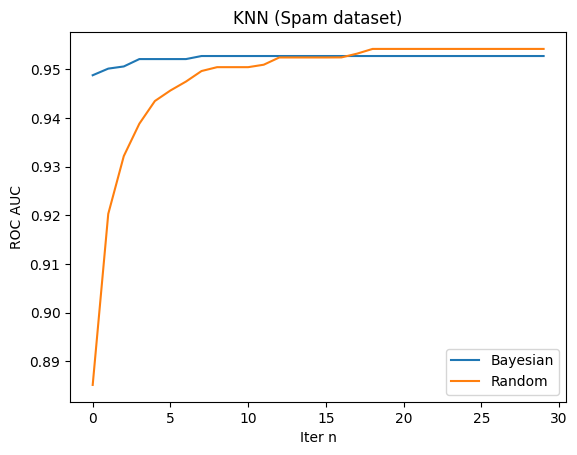

In [110]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'spam'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.spam_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('KNN (Spam dataset)')

In [111]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9527
ROC AUC score for Random search: 0.9541


#### MagicTelescope

Text(0.5, 1.0, 'KNN (MT dataset)')

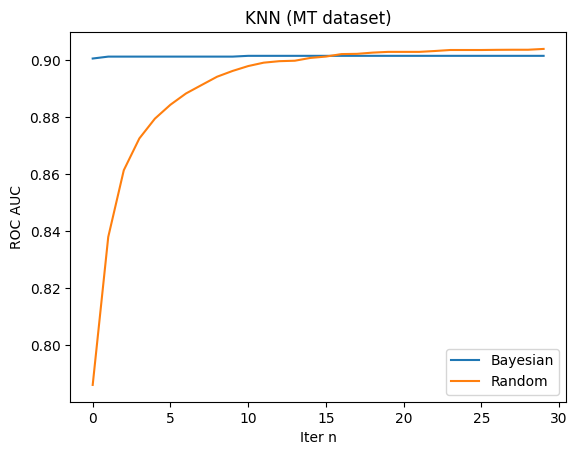

In [118]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'mt'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.mt_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('KNN (MT dataset)')

In [113]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9015
ROC AUC score for Random search: 0.9039


#### KC1

Text(0.5, 1.0, 'KNN (KC1 dataset)')

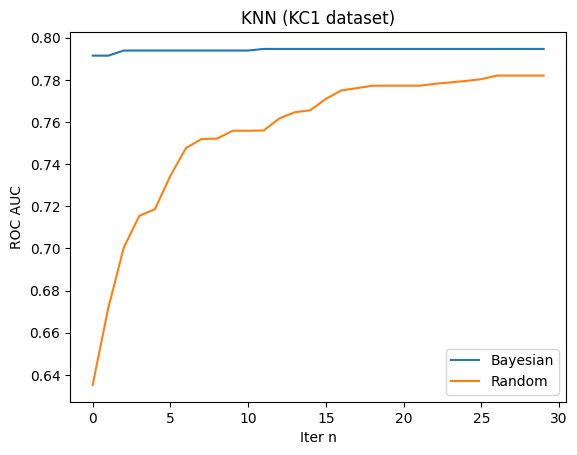

In [117]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'kc1'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.kc1_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('KNN (KC1 dataset)')

#### Phoneme

Text(0.5, 1.0, 'KNN (Phoneme dataset)')

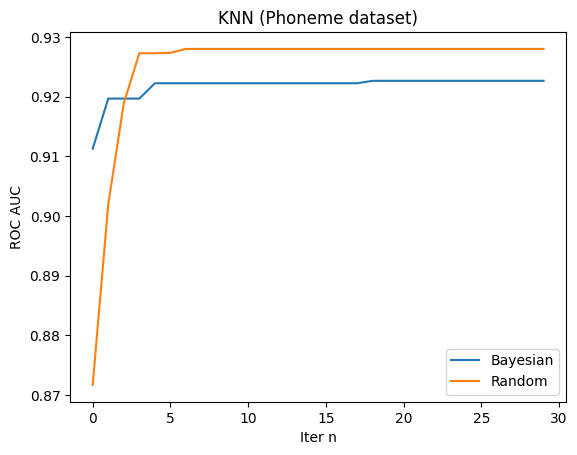

In [119]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'phoneme'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.phoneme_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('KNN (Phoneme dataset)')

In [120]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9226
ROC AUC score for Random search: 0.9280


### Tunability

Text(0.5, 1.0, 'n_neighb tunability (Random defaults)')

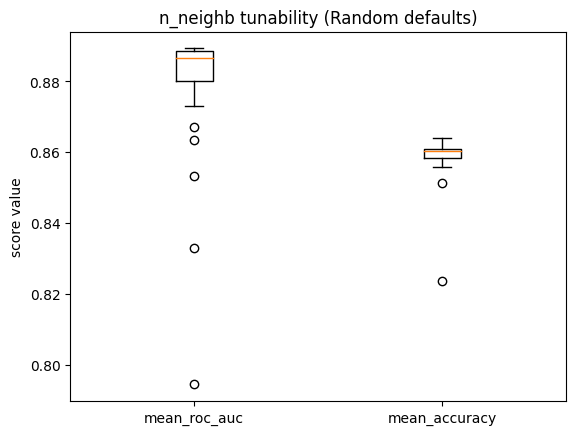

In [115]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("n_neighbours tunability (Random defaults)")

#### Tunability Scores

In [105]:
metric = 'roc_auc'
dataset_names = ['spam', 'mt', 'kc1', 'phoneme'] #datasets.keys()
n_datasets = len(dataset_names)
params = ['ccp_alpha', 'max_depth', 'min_samples_leaf', 'min_samples_split']
columns = ['model', 'parameter', 'search_type', 'tunability']

default_scores =  pd.read_csv('results/knn/knn_default_random_scores.csv').sort_values(f'mean_{metric}', ascending=False).iloc[0]
default_score = default_scores[f'mean_{metric}']

bayes_scores = pd.read_csv('results/knn/knn_default_bayes_scores.csv')
bayes_score = np.mean(bayes_scores[f'test_{metric}'])

tunability = 0

tuned_df = pd.read_csv('results/knn/knn_default_random_scores.csv')
for name in dataset_names:
    max_score = max(tuned_df[f'{name}_{metric}'])
    tunability += max_score
    
tunability /= n_datasets
tunability -= default_score

results = [['knn', 'n_neighbors', 'random', tunability],
           ['knn', 'n_neighbors', 'bayes', bayes_score-default_score]]

    
knn_tunability = pd.DataFrame(results, columns=columns)
knn_tunability

,model,parameter,search_type,tunability
0,knn,n_neighbors,random,0.002740
1,knn,n_neighbors,bayes,-0.001045


# Random Forest

## Default Optimization

### Random Search

In [ ]:
opt = optimizers.RFRandomOptimizer(datasets)

In [ ]:
opt.optimize(n_iter=100)

Running iteration 1/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 2/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 3/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 4/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 5/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 6/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 7/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 8/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 9/100
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 10/100
Run

In [ ]:
pickle.dump(opt, open('/work/results/rf/rf_default_random.pkl', 'wb'))

In [ ]:
rf_default_scores = opt.scores
rf_default_scores.to_csv('/work/results/rf/rf_default_random_scores.csv')

In [ ]:
rf_defaults, rf_default_score = opt.get_optimal_hyperparameters('mean_roc_auc')

In [ ]:
rf_defaults

"{'random_state': 42, 'n_estimators': 1064, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 23}"

In [ ]:
rf_default_score

0.9147758726832786

### Bayesian Search

In [ ]:
opt = optimizers.RFBayesOptimizer(datasets)

In [ ]:
opt.optimize(n_iter=75)

Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme


In [ ]:
pickle.dump(opt, open('/work/results/rf/rf_default_bayes.pkl', 'wb'))

In [ ]:
opt.best_scores.to_csv('/work/results/rf/rf_default_bayes_scores.csv')
opt.best_scores

,hyperparameters,dataset,test_brier,test_roc_auc,test_accuracy
0,"OrderedDict([('model__max_depth', 15), ('model...",spam,0.064539,0.970793,0.921824
1,"OrderedDict([('model__max_depth', 15), ('model...",mt,0.092246,0.931666,0.878023
2,"OrderedDict([('model__max_depth', 9), ('model_...",kc1,0.110599,0.799647,0.845972
3,"OrderedDict([('model__max_depth', 15), ('model...",phoneme,0.069935,0.962734,0.910268


In [ ]:
rf_default_scores_iter = opt.iter_scores
rf_default_scores_iter.to_csv('/work/results/rf/rf_default_bayes_scores_iter.csv')
rf_default_scores_iter.head()

,iter,dataset,hyperparameters,roc_auc
0,0,spam,"{'model__max_depth': 12, 'model__min_samples_l...",0.946309
1,1,spam,"{'model__max_depth': 8, 'model__min_samples_le...",0.953344
2,2,spam,"{'model__max_depth': 9, 'model__min_samples_le...",0.944460
3,3,spam,"{'model__max_depth': 13, 'model__min_samples_l...",0.944977
4,4,spam,"{'model__max_depth': 12, 'model__min_samples_l...",0.947630


### Results

In [121]:
bayes_scores = pd.read_csv('results/rf/rf_default_bayes_scores_iter.csv')

In [122]:
bayes_scores.head()

,Unnamed: 0,iter,dataset,hyperparameters,roc_auc
0,0,0,spam,"{'model__max_depth': 12, 'model__min_samples_l...",0.946309
1,1,1,spam,"{'model__max_depth': 8, 'model__min_samples_le...",0.953344
2,2,2,spam,"{'model__max_depth': 9, 'model__min_samples_le...",0.944460
3,3,3,spam,"{'model__max_depth': 13, 'model__min_samples_l...",0.944977
4,4,4,spam,"{'model__max_depth': 12, 'model__min_samples_l...",0.947630


In [123]:
random_scores = pd.read_csv('results/rf/rf_default_random_scores.csv')

In [124]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'n_estimators': 1912, 'ma...",0.107781,0.892610,0.859563,0.095489,0.946688,0.892633,0.110391,0.912871,0.852419,0.110014,0.801257,0.848267,0.115230,0.909622,0.844931
1,1,"{'random_state': 42, 'n_estimators': 552, 'max...",0.104383,0.896319,0.861497,0.085150,0.952012,0.897633,0.117305,0.904799,0.845478,0.108599,0.805755,0.846843,0.106479,0.922709,0.856034
2,2,"{'random_state': 42, 'n_estimators': 110, 'max...",0.154661,0.841413,0.786655,0.160301,0.922433,0.819605,0.184691,0.821646,0.728812,0.113640,0.781819,0.845424,0.160014,0.839752,0.752777
3,3,"{'random_state': 42, 'n_estimators': 1958, 'ma...",0.110717,0.888605,0.854621,0.095837,0.946100,0.891112,0.119078,0.902297,0.843796,0.110008,0.801240,0.848267,0.117944,0.904784,0.835308
4,4,"{'random_state': 42, 'n_estimators': 1777, 'ma...",0.101874,0.899960,0.866838,0.089521,0.950639,0.896764,0.102287,0.922927,0.862461,0.109506,0.803284,0.849689,0.106181,0.922992,0.858440


#### Spam

Text(0.5, 1.0, 'Random Forest Classifier (Spam dataset)')

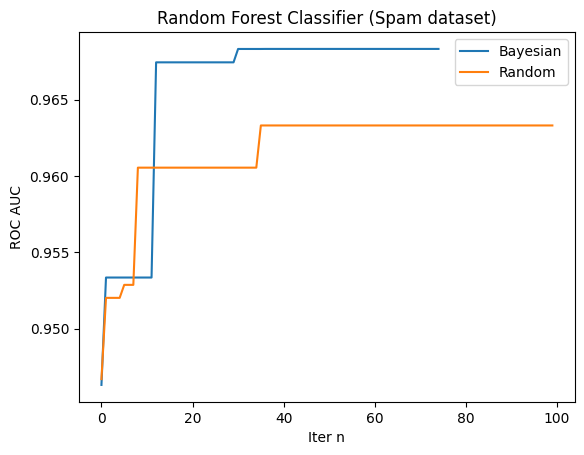

In [125]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'spam'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.spam_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Random Forest Classifier (Spam dataset)')

In [126]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9683
ROC AUC score for Random search: 0.9633


#### MagicTelescope

Text(0.5, 1.0, 'Random Forest Classifier (MT dataset)')

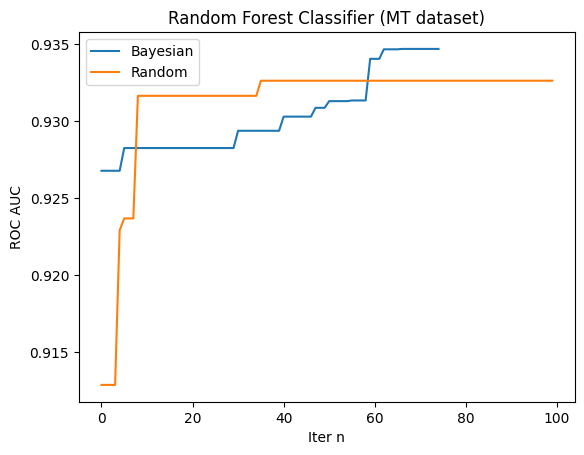

In [127]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'mt'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.mt_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Random Forest Classifier (MT dataset)')

In [128]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9347
ROC AUC score for Random search: 0.9326


#### KC1

Text(0.5, 1.0, 'Random Forest Classifier (KC1 dataset)')

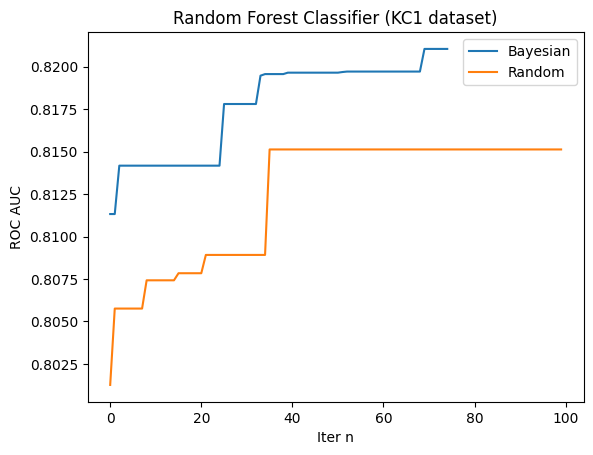

In [129]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'kc1'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.kc1_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Random Forest Classifier (KC1 dataset)')

In [130]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.8210
ROC AUC score for Random search: 0.8151


#### Phoneme

Text(0.5, 1.0, 'Random Forest Classifier (Phoneme dataset)')

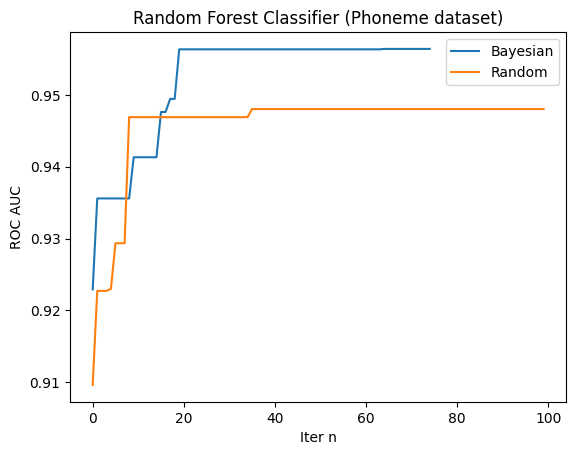

In [132]:
accumulated_bayes = np.maximum.accumulate(bayes_scores.loc[bayes_scores['dataset'] == 'phoneme'].roc_auc).ravel()
accumulated_random = np.maximum.accumulate(random_scores.phoneme_roc_auc).ravel()

plt.plot(accumulated_bayes, label="Bayesian")
plt.plot(accumulated_random, label="Random")
plt.legend()
plt.xlabel('Iter n')
plt.ylabel('ROC AUC')
plt.title('Random Forest Classifier (Phoneme dataset)')

In [133]:
print(f'ROC AUC score for Bayesian search: {accumulated_bayes[-1]:.4f}')
print(f'ROC AUC score for Random search: {accumulated_random[-1]:.4f}')

ROC AUC score for Bayesian search: 0.9564
ROC AUC score for Random search: 0.9480


## Tunability

In [ ]:
{'random_state': 42,
'n_estimators': 1064,
'max_depth': 15, 
'min_samples_leaf': 1, 
'min_samples_split': 23}

In [9]:
bayes_defaults = {
    "spam": {
        "max_depth": 15,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "n_estimators": 1065,
    },
    "mt": {
        "max_depth": 15,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "n_estimators": 1570,
    },
    "kc1": {
        "max_depth": 9,
        "min_samples_leaf": 1,
        "min_samples_split": 60,
        "n_estimators": 799,
    },
    "phoneme": {
        "max_depth": 15,
        "min_samples_leaf": 1,
        "min_samples_split": 2,
        "n_estimators": 1181,
    }
}

### max_depth

#### Random search -> Random search

In [ ]:
opt = optimizers.RFRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'n_estimators': 1064, 
                'min_samples_leaf': 1, 
                'min_samples_split': 23})

In [ ]:
opt.optimize(n_iter=50)

Running iteration 1/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 2/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 3/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 4/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 5/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 6/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 7/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 8/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 9/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 10/50
Running datas

In [ ]:
pickle.dump(opt, open('/work/results/rf/rf_max_depth_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/rf/rf_max_depth_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.RFRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'n_estimators': bayes_defaults[dataset_name]['n_estimators'], 
                'min_samples_leaf': bayes_defaults[dataset_name]['min_samples_leaf'], 
                'min_samples_split': bayes_defaults[dataset_name]['min_samples_split']})
    opt.optimize(n_iter=50)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    gc.collect()
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('results/rf/rf_max_depth_bayes_scores.csv')

#### Results

In [8]:
bayes_scores = pd.read_csv('results/rf/rf_max_depth_bayes_scores.csv')

In [9]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'random_state': 42, 'n_estimators': 1065, 'ma...",0.088157,0.949920,0.895458,spam
1,1,"{'random_state': 42, 'n_estimators': 1065, 'ma...",0.081633,0.954381,0.901762,spam
2,2,"{'random_state': 42, 'n_estimators': 1065, 'ma...",0.096275,0.945312,0.889808,spam
3,3,"{'random_state': 42, 'n_estimators': 1065, 'ma...",0.072161,0.961330,0.910238,spam
4,4,"{'random_state': 42, 'n_estimators': 1065, 'ma...",0.081633,0.954381,0.901762,spam


In [10]:
random_scores = pd.read_csv('results/rf/rf_max_depth_random_scores.csv')

In [11]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.090864,0.912510,0.880252,0.073233,0.961563,0.908501,0.097000,0.928092,0.870925,0.106654,0.814009,0.855385,0.086569,0.946377,0.886198
1,1,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.124314,0.874504,0.833413,0.107611,0.940420,0.882417,0.146210,0.876829,0.802471,0.109251,0.806848,0.847320,0.134184,0.873918,0.801443
2,2,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.098745,0.904223,0.870490,0.078881,0.956250,0.903935,0.110662,0.913080,0.853943,0.106920,0.814252,0.854909,0.098516,0.933307,0.869172
3,3,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.135057,0.864832,0.813732,0.124304,0.935384,0.871768,0.161224,0.867233,0.752944,0.110269,0.802703,0.845424,0.144434,0.854006,0.784789
4,4,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.095507,0.907569,0.873376,0.076329,0.958456,0.906543,0.105558,0.918616,0.859516,0.106730,0.813925,0.852537,0.093411,0.939279,0.874909


Text(0.5, 1.0, 'max_depth tunability (Random defaults)')

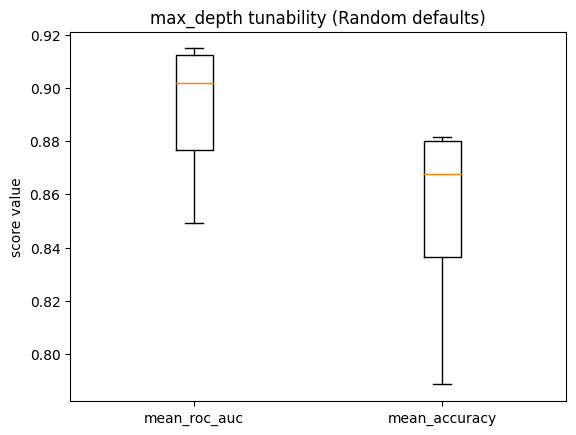

In [12]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("max_depth tunability (Random defaults)")

Text(0.5, 1.0, 'max_depth tunability (Bayesian defaults)')

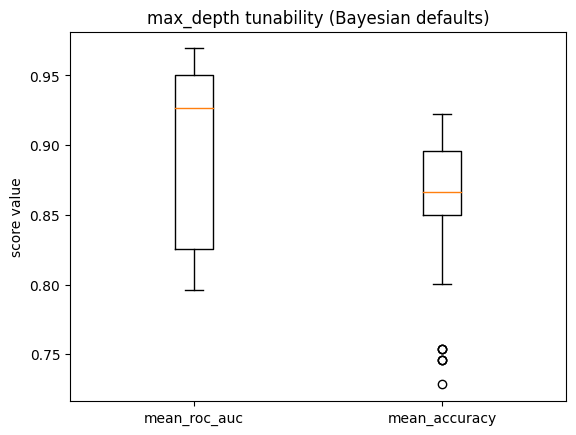

In [13]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("max_depth tunability (Bayesian defaults)")

### min_samples_leaf

#### Random search -> Random search

In [ ]:
opt = optimizers.RFRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'n_estimators': 1064, 
                'max_depth': 15, 
                'min_samples_split': 23})

In [ ]:
opt.optimize(n_iter=50)

In [ ]:
pickle.dump(opt, open('/work/results/rf/rf_min_samples_leaf_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/rf/rf_min_samples_leaf_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.RFRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'max_depth': bayes_defaults[dataset_name]['max_depth'], 
                'n_estimators': bayes_defaults[dataset_name]['n_estimators'], 
                'min_samples_split': bayes_defaults[dataset_name]['min_samples_split']})
    opt.optimize(n_iter=50)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    gc.collect()
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('results/rf/rf_min_samples_leaf_bayes_scores.csv')

#### Results

In [134]:
bayes_scores = pd.read_csv('results/rf/rf_min_samples_leaf_bayes_scores.csv')

In [135]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.082995,0.955124,0.899371,spam
1,1,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.093474,0.948095,0.893938,spam
2,2,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.086190,0.952818,0.898502,spam
3,3,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.089869,0.950381,0.896546,spam
4,4,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.087617,0.951693,0.897633,spam


In [136]:
random_scores = pd.read_csv('results/rf/rf_min_samples_leaf_random_scores.csv')

In [137]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.099677,0.902262,0.868461,0.086879,0.952376,0.897850,0.100346,0.925339,0.865983,0.109271,0.803275,0.847317,0.102213,0.928060,0.862696
1,1,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.106187,0.894698,0.861536,0.094770,0.947138,0.891547,0.105687,0.919262,0.858412,0.110005,0.801393,0.849216,0.114285,0.911000,0.846967
2,2,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.105445,0.895589,0.862612,0.093915,0.947818,0.892634,0.105046,0.920068,0.859411,0.109966,0.801182,0.849216,0.112852,0.913288,0.849187
3,3,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.105445,0.895589,0.862612,0.093915,0.947818,0.892634,0.105046,0.920068,0.859411,0.109966,0.801182,0.849216,0.112852,0.913288,0.849187
4,4,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.100803,0.901110,0.867427,0.088369,0.951223,0.898068,0.101265,0.924241,0.864090,0.109429,0.803244,0.848740,0.104147,0.925733,0.858810


Text(0.5, 1.0, 'min_samples_leaf tunability (Random defaults)')

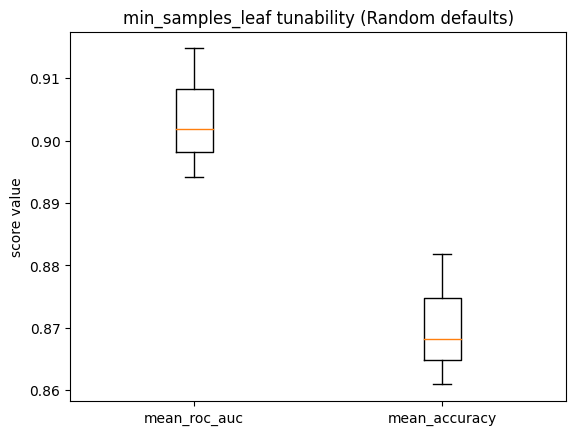

In [138]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_leaf tunability (Random defaults)")

Text(0.5, 1.0, 'min_samples_leaf tunability (Bayesian defaults)')

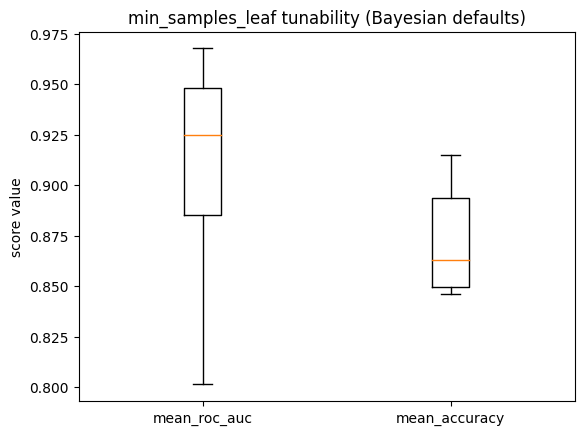

In [139]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_leaf tunability (Bayesian defaults)")

### min_samples_split

#### Random search -> Random search

In [ ]:
opt = optimizers.RFRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'n_estimators': 1064, 
                'max_depth': 15, 
                'min_samples_leaf': 1})

In [ ]:
opt.optimize(n_iter=50)

In [ ]:
pickle.dump(opt, open('/work/results/rf/rf_min_samples_split_random.pkl', 'wb'))

In [ ]:
opt.scores.to_csv('/work/results/rf/rf_min_samples_split_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.RFRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'max_depth': bayes_defaults[dataset_name]['max_depth'], 
                'n_estimators': bayes_defaults[dataset_name]['n_estimators'], 
                'min_samples_leaf': bayes_defaults[dataset_name]['min_samples_leaf']})
    opt.optimize(n_iter=50)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    gc.collect()
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('results/rf/rf_min_samples_split_bayes_scores.csv')

#### Results

In [140]:
bayes_scores = pd.read_csv('results/rf/rf_min_samples_split_bayes_scores.csv')

In [141]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.080235,0.957719,0.905241,spam
1,1,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.078442,0.958951,0.905458,spam
2,2,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.076028,0.960551,0.907414,spam
3,3,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.080053,0.957944,0.904806,spam
4,4,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.069149,0.965439,0.911761,spam


In [142]:
random_scores = pd.read_csv('results/rf/rf_min_samples_split_random_scores.csv')

In [143]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.087064,0.916956,0.885457,0.069145,0.965446,0.911543,0.092451,0.933504,0.876709,0.106153,0.816679,0.857756,0.080507,0.952195,0.895820
1,1,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.095288,0.908336,0.875650,0.080522,0.957563,0.905241,0.096548,0.929296,0.872345,0.107420,0.811678,0.851584,0.096661,0.934809,0.873428
2,2,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.085299,0.918536,0.888124,0.066435,0.967113,0.916324,0.091956,0.934099,0.877497,0.106452,0.816581,0.858229,0.076353,0.956351,0.900445
3,3,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.086800,0.917287,0.885605,0.068840,0.965605,0.913934,0.092457,0.933555,0.876393,0.106097,0.817006,0.857755,0.079807,0.952981,0.894340
4,4,"{'random_state': 42, 'n_estimators': 1064, 'ma...",0.092132,0.911535,0.878555,0.076325,0.960382,0.906110,0.094744,0.931201,0.873344,0.107006,0.812423,0.853010,0.090452,0.942135,0.881756


Text(0.5, 1.0, 'min_samples_split tunability (Random defaults)')

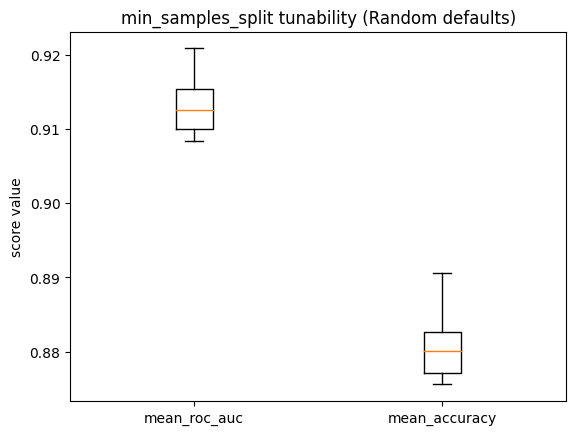

In [144]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_split tunability (Random defaults)")

Text(0.5, 1.0, 'min_samples_split tunability (Bayesian defaults)')

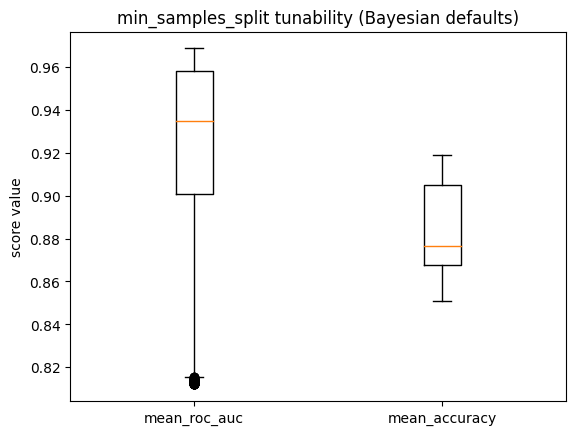

In [145]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("min_samples_split tunability (Bayesian defaults)")

### n_estimators

#### Random search -> Random search

In [14]:
opt = optimizers.RFRandomOptimizer(datasets)
opt.set_default_params({'random_state': 42,
                'max_depth': 15, 
                'min_samples_leaf': 1, 
                'min_samples_split': 23})

In [15]:
opt.optimize(n_iter=50)

Running iteration 1/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 2/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 3/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 4/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 5/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 6/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 7/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 8/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 9/50
Running dataset spam
Running dataset mt
Running dataset kc1
Running dataset phoneme
Running iteration 10/50
Running datas

In [17]:
pickle.dump(opt, open('results/rf/rf_n_estimators_random.pkl', 'wb'))

In [18]:
opt.scores.to_csv('results/rf/rf_n_estimators_random_scores.csv')

#### Bayesian search -> Random search

In [ ]:
results = []
for dataset_name, dataset in datasets.items():
    opt = optimizers.RFRandomOptimizer({dataset_name: dataset})
    opt.set_default_params({'random_state': 42,
                'max_depth': bayes_defaults[dataset_name]['max_depth'], 
                'min_samples_split': bayes_defaults[dataset_name]['min_samples_split'], 
                'min_samples_leaf': bayes_defaults[dataset_name]['min_samples_leaf']})
    opt.optimize(n_iter=50)
    sc_temp = opt.scores[["hyperparameters", "mean_brier", "mean_roc_auc", "mean_accuracy"]]
    sc_temp["dataset"] = dataset_name
    gc.collect()
    results.append(sc_temp)
bs_scores = pd.concat(results)
bs_scores.to_csv('results/rf/rf_n_estimators_bayes_scores.csv')

#### Results

In [146]:
bayes_scores = pd.read_csv('results/rf/rf_n_estimators_bayes_scores.csv')

In [148]:
bayes_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,dataset
0,0,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.062020,0.969396,0.921975,spam
1,1,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.062079,0.969367,0.922627,spam
2,2,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.062040,0.969369,0.922193,spam
3,3,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.062031,0.969409,0.921975,spam
4,4,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.061894,0.969369,0.923497,spam


In [147]:
random_scores = pd.read_csv('results/rf/rf_n_estimators_random_scores.csv')

In [149]:
random_scores.head()

,Unnamed: 0,hyperparameters,mean_brier,mean_roc_auc,mean_accuracy,spam_brier,spam_roc_auc,spam_accuracy,mt_brier,mt_roc_auc,mt_accuracy,kc1_brier,kc1_roc_auc,kc1_accuracy,phoneme_brier,phoneme_roc_auc,phoneme_accuracy
0,0,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.089146,0.914837,0.881531,0.072241,0.963200,0.908066,0.093264,0.932733,0.875657,0.106246,0.815391,0.854909,0.084832,0.948026,0.887493
1,1,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.089227,0.914456,0.880546,0.072019,0.963436,0.908283,0.093495,0.932317,0.874606,0.106334,0.814386,0.852541,0.085059,0.947684,0.886753
2,2,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.089158,0.914748,0.881562,0.072258,0.963156,0.908718,0.093280,0.932699,0.875499,0.106262,0.815116,0.854909,0.084833,0.948020,0.887123
3,3,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.089162,0.914762,0.881788,0.072241,0.963246,0.908935,0.093298,0.932657,0.875710,0.106306,0.815110,0.855383,0.084802,0.948035,0.887123
4,4,"{'n_jobs': -1, 'random_state': 42, 'n_estimato...",0.089113,0.914891,0.881072,0.072188,0.963258,0.908283,0.093319,0.932668,0.875026,0.106177,0.815596,0.853486,0.084768,0.948041,0.887493


Text(0.5, 1.0, 'n_estimators tunability (Random defaults)')

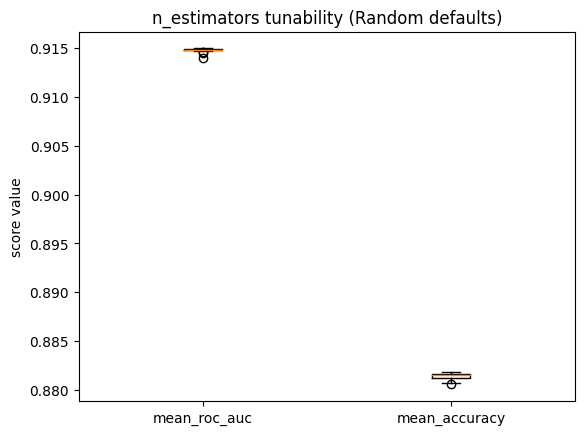

In [150]:
plt.boxplot(random_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("n_estimators tunability (Random defaults)")

Text(0.5, 1.0, 'n_estimators tunability (Bayesian defaults)')

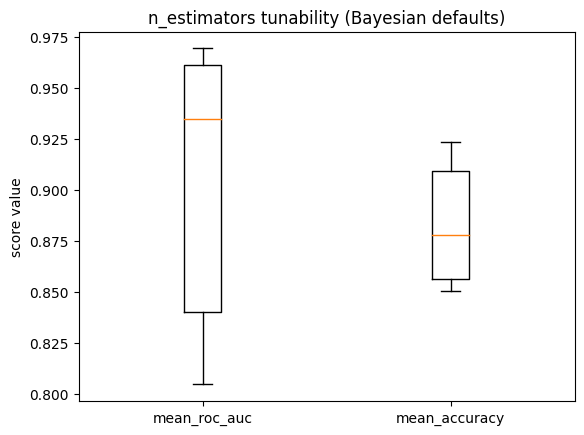

In [151]:
plt.boxplot(bayes_scores[["mean_roc_auc", "mean_accuracy"]])
plt.ylabel("score value")
plt.xticks([1, 2], ['mean_roc_auc', 'mean_accuracy'])
plt.title("n_estimators tunability (Bayesian defaults)")

### Tunability Scores

In [127]:
metric = 'roc_auc'
dataset_names = ['spam', 'mt', 'kc1', 'phoneme'] #datasets.keys()
n_datasets = len(dataset_names)
params = ['n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split']
columns = ['model', 'parameter', 'search_type', 'tunability']
results = []

default_scores = pd.read_csv('results/rf/rf_default_random_scores.csv').sort_values(f'mean_{metric}', ascending=False).iloc[0]
default_score = default_scores[f'mean_{metric}']

for param in params:
    tuned_df = pd.read_csv(f'results/rf/rf_{param}_random_scores.csv')
    tunability = 0
    
    for name in dataset_names:
        max_score = max(tuned_df[f'{name}_{metric}'])
        tunability += max_score
        
    tunability /= n_datasets
    tunability -= default_score
    results.append(['rf', param, 'random', tunability])
    
random_tunability = pd.DataFrame(results, columns=columns)
random_tunability

,model,parameter,search_type,tunability
0,rf,n_estimators,random,0.0003
1,rf,max_depth,random,0.0001
2,rf,min_samples_leaf,random,0.0000
3,rf,min_samples_split,random,0.0061


In [128]:
metric = 'roc_auc'
dataset_names = ['spam', 'mt', 'kc1', 'phoneme'] #datasets.keys()
n_datasets = len(dataset_names)
params = ['n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split']
columns = ['model', 'parameter', 'search_type', 'tunability']
results = []

default_scores = pd.read_csv('results/rf/rf_default_bayes_scores.csv')
default_score = np.mean(default_scores[f'test_{metric}'])


for param in params:
    tuned_df = pd.read_csv(f'results/rf/rf_{param}_bayes_scores.csv')
    tunability = 0
    
    for name in dataset_names:
        max_score = max(tuned_df.loc[tuned_df['dataset'] == name][f'mean_{metric}'])
        tunability += max_score
        
    tunability /= n_datasets
    tunability -= default_score
    results.append(['rf', param, 'bayes', tunability])
    
bayes_tunability = pd.DataFrame(results, columns=columns)
bayes_tunability

,model,parameter,search_type,tunability
0,rf,n_estimators,bayes,0.0033
1,rf,max_depth,bayes,0.0032
2,rf,min_samples_leaf,bayes,0.0016
3,rf,min_samples_split,bayes,0.0039


In [129]:
rf_tunability = pd.concat([random_tunability, bayes_tunability], ignore_index=True)
rf_tunability

,model,parameter,search_type,tunability
0,rf,n_estimators,random,0.0003
1,rf,max_depth,random,0.0001
2,rf,min_samples_leaf,random,0.0000
3,rf,min_samples_split,random,0.0061
4,rf,n_estimators,bayes,0.0033
5,rf,max_depth,bayes,0.0032
6,rf,min_samples_leaf,bayes,0.0016
7,rf,min_samples_split,bayes,0.0039


# Summary

In [144]:
summary = pd.concat([dtc_tunability, knn_tunability, rf_tunability], ignore_index=True).set_index(['model', 'parameter', 'search_type']).sort_index()

In [145]:
summary

tunability
model parameter         search_type            
dtc   ccp_alpha         bayes            0.0022
                        random          -0.0276
      max_depth         bayes            0.0084
                        random           0.0046
      min_samples_leaf  bayes            0.0095
                        random           0.0045
      min_samples_split bayes            0.0062
                        random           0.0000
knn   n_neighbors       bayes           -0.0010
                        random           0.0027
rf    max_depth         bayes            0.0032
                        random           0.0001
      min_samples_leaf  bayes            0.0016
                        random           0.0000
      min_samples_split bayes            0.0039
                        random           0.0061
      n_estimators      bayes            0.0033
                        random           0.0003